**Grupo:**

Charles Gabriel - cgcc

Paulo Henrique Leite - plthc

O objetivo do projeto é usar métodos de diagnóstico descritas no artigo para entender as vantagens ao usar determinadas técnicas de explicabilidade para classificação de texto


#Dataset: https://www.kaggle.com/competitions/tweet-sentiment-extraction/data

#Artigo: https://aclanthology.org/2020.emnlp-main.263.pdf

#Preparação

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/TSE/train.csv'
test_dir = '/content/drive/MyDrive/TSE/test.csv'

In [ ]:
import pandas as pd

# Carregar o dataset de treinamento
train_df = pd.read_csv(data_dir)
test_df = pd.read_csv(test_dir)

# Visualizar as primeiras linhas e informações básicas do dataset
print(train_df.head())
print(train_df.info())

# Verificar contagem de exemplos por classe de sentimento
sentiment_counts = train_df['sentiment'].value_counts()
print(sentiment_counts)


       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   

In [ ]:
# Verificar as primeiras linhas do dataset
print(train_df.head())

# Verificar contagem de exemplos por classe de sentimento
sentiment_counts = train_df['sentiment'].value_counts()
print("\nContagem de exemplos por classe de sentimento:")
print(sentiment_counts)

# Exibir alguns exemplos de textos
print("\nExemplos de textos:")
for i in range(5):  # Exibir os primeiros 5 exemplos
    print(f"\nTexto: {train_df['text'][i]}")
    print(f"Sentimento: {train_df['sentiment'][i]}")


       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative  

Contagem de exemplos por classe de sentimento:
sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64

Exemplos de textos:

Texto:  I`d have responded, if I were going
Sentimento: neutral

Texto:  Sooo SAD I will miss you here in San Diego!!!
Sentim

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

# Função para limpar e tokenizar textos
def preprocess_text(text):
    # Verificar se o texto é uma string
    if isinstance(text, str):
        # Remover caracteres especiais e URLs
        text = re.sub(r'\W', ' ', text)
        text = re.sub(r'http\S+', '', text)

        # Converter para minúsculas
        text = text.lower()

        # Tokenização
        tokens = word_tokenize(text)

        # Remover stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]

        return tokens
    else:
        return []

# Aplicar preprocessamento aos textos
train_df['cleaned_text'] = train_df['text'].apply(preprocess_text)
test_df['cleaned_text'] = test_df['text'].apply(preprocess_text)

# Exibir alguns exemplos de textos limpos e tokenizados
print("Exemplos de textos limpos e tokenizados:")
for i in range(5):  # Exibir os primeiros 5 exemplos
    print(f"\nTexto Original: {train_df['text'][i]}")
    print(f"Texto Limpo e Tokenizado: {train_df['cleaned_text'][i]}")
    print(f"Sentimento: {train_df['sentiment'][i]}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Exemplos de textos limpos e tokenizados:

Texto Original:  I`d have responded, if I were going
Texto Limpo e Tokenizado: ['responded', 'going']
Sentimento: neutral

Texto Original:  Sooo SAD I will miss you here in San Diego!!!
Texto Limpo e Tokenizado: ['sooo', 'sad', 'miss', 'san', 'diego']
Sentimento: negative

Texto Original: my boss is bullying me...
Texto Limpo e Tokenizado: ['boss', 'bullying']
Sentimento: negative

Texto Original:  what interview! leave me alone
Texto Limpo e Tokenizado: ['interview', 'leave', 'alone']
Sentimento: negative

Texto Original:  Sons of ****, why couldn`t they put them on the releases we already bought
Texto Limpo e Tokenizado: ['sons', 'put', 'releases', 'already', 'bought']
Sentimento: negative


In [ ]:
train_df.head()

,textID,text,selected_text,sentiment,cleaned_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"[responded, going]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"[sooo, sad, miss, san, diego]"
2,088c60f138,my boss is bullying me...,bullying me,negative,"[boss, bullying]"
3,9642c003ef,what interview! leave me alone,leave me alone,negative,"[interview, leave, alone]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"[sons, put, releases, already, bought]"


In [ ]:
train_df.head()

,textID,text,selected_text,sentiment,cleaned_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"[responded, going]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"[sooo, sad, miss, san, diego]"
2,088c60f138,my boss is bullying me...,bullying me,negative,"[boss, bullying]"
3,9642c003ef,what interview! leave me alone,leave me alone,negative,"[interview, leave, alone]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"[sons, put, releases, already, bought]"


#Modelos

In [ ]:
!pip install gensim

In [ ]:
import gensim.downloader as api

In [ ]:
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
# Carregar o dataset de treinamento
train_df = pd.read_csv('/content/drive/MyDrive/TSE/train.csv')
test_df = pd.read_csv(test_dir)

# Converter sentimentos em números
label_encoder = LabelEncoder()
train_df['encoded_sentiment'] = label_encoder.fit_transform(train_df['sentiment'])
test_df['encoded_sentiment'] = label_encoder.fit_transform(test_df['sentiment'])

# Pré-processamento básico
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if isinstance(text, str):  # Verificar se o texto é uma string
        text = text.lower()  # Converter para minúsculas
        text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remover URLs
        text = re.sub(r'<.*?>+', '', text)  # Remover tags HTML
        text = re.sub(r'[^\w\s]', '', text)  # Remover pontuação
        text = re.sub(r'\d+', '', text)  # Remover dígitos
        text = ' '.join(word for word in text.split() if word not in stop_words)  # Remover stop words
    return text

# Aplicar pré-processamento aos textos
train_df['cleaned_text'] = train_df['text'].apply(preprocess_text)
test_df['cleaned_text'] = test_df['text'].apply(preprocess_text)

# Remover linhas com valores NaN após o pré-processamento
train_df = train_df.dropna(subset=['cleaned_text'])
test_df = test_df.dropna(subset=['cleaned_text'])

# Dividir dados em conjunto de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(train_df['cleaned_text'], train_df['encoded_sentiment'], test_size=0.2, random_state=42)

X_test = test_df['cleaned_text']
y_test = test_df['encoded_sentiment']

# Tokenização e criação do vocabulário
class Tokenizer:
    def __init__(self):
        self.vocab = {}
        self.index = 1  # 0 será reservado para palavras fora do vocabulário
        self.pad_token = '<pad>'
        self.pad_index = 0  # Índice do token de padding

    def fit(self, texts):
        max_len = 0
        for text in texts:
            tokens = word_tokenize(text)
            max_len = max(max_len, len(tokens))
            for token in tokens:
                if token not in self.vocab:
                    self.vocab[token] = self.index
                    self.index += 1
        self.max_len = max_len

    def transform(self, texts):
        tokenized_texts = []
        for text in texts:
            tokens = word_tokenize(text)
            token_indices = [self.vocab.get(token, 0) for token in tokens]  # 0 para palavras fora do vocabulário
            tokenized_texts.append(token_indices)
        return tokenized_texts

    def get_pad_index(self):
        return self.pad_index

    def get_vocab_size(self):
        return len(self.vocab) + 1  # +1 para o token de padding

    def get_max_len(self):
        return self.max_len


# Criar vocabulário e converter textos em sequências de tokens
tokenizer = Tokenizer()
tokenizer.fit(X_train)
X_train_tokenized = tokenizer.transform(X_train)
X_val_tokenized = tokenizer.transform(X_val)

# Converter textos de teste em sequências de tokens
X_test_tokenized = tokenizer.transform(X_test)

# Função para padronizar o comprimento das sequências
def pad_sequences(sequences, max_len, pad_index):
    padded_sequences = []
    for seq in sequences:
        if len(seq) < max_len:
            seq = seq + [pad_index] * (max_len - len(seq))
        elif len(seq) > max_len:
            seq = seq[:max_len]
        padded_sequences.append(seq)
    return padded_sequences


# Aplicar padding às sequências
pad_index = tokenizer.get_pad_index()
X_train_padded = pad_sequences(X_train_tokenized, tokenizer.get_max_len(), pad_index)
X_val_padded = pad_sequences(X_val_tokenized, tokenizer.get_max_len(), pad_index)
X_test_padded = pad_sequences(X_test_tokenized, tokenizer.get_max_len(), pad_index)

# Converter para tensores do PyTorch
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)
X_train_tensor = torch.tensor(X_train_padded, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_padded, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_padded, dtype=torch.long)

# Definir DataLoader para treinamento e validação
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=64)

# Definir DataLoader para teste
test_dataset = TensorDataset(X_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Função de treinamento
def train(model, train_loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(train_loader)

# Função de avaliação
def evaluate(model, val_loader):
    model.eval()
    predictions = []
    true_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            predictions.extend(predicted.tolist())
            true_labels.extend(labels.tolist())
    accuracy = accuracy_score(true_labels, predictions)
    return accuracy

##CNN

In [ ]:
class CNNTextClassifier(nn.Module):
    def __init__(self, embedding_matrix, num_filters, filter_sizes, num_classes):
        super(CNNTextClassifier, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(embedding_matrix, freeze=False) # Usar embeddings do Word2Vec
        self.convs = nn.ModuleList([
            nn.Conv2d(1, num_filters, (k, embedding_dim)) for k in filter_sizes
        ])
        self.fc = nn.Linear(num_filters * len(filter_sizes), num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Aplicar embedding
        x = self.embedding(x)
        x = x.unsqueeze(1)

        # Aplicar convoluções e pooling
        x = [torch.relu(conv(x)).squeeze(3) for conv in self.convs]
        x = [torch.max_pool1d(conv, conv.size(2)).squeeze(2) for conv in x]

        # Concatenar saídas das convoluções
        x = torch.cat(x, 1)

        # Dropout
        x = self.dropout(x)

        # Fully connected layer
        logits = self.fc(x)
        return logits

# Definir hiperparâmetros
vocab_size = len(tokenizer.vocab) + 1
num_filters = 128
filter_sizes = [3, 3, 4]  # Tamanhos dos filtros convolucionais
num_classes = len(label_encoder.classes_)

embedding_dim = 300  # Dimensão dos embeddings do Word2Vec
embedding_matrix = torch.randn(vocab_size, embedding_dim)

for word, index in tokenizer.vocab.items():
    if word in wv:
        embedding_matrix[index] = torch.tensor(wv[word])

# Criar instância do modelo CNN
model_cnn = CNNTextClassifier(embedding_matrix, num_filters, filter_sizes, num_classes)
print(model_cnn)

# Definir otimizador e função de perda
optimizer = optim.Adam(model_cnn.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Treinamento do modelo
num_epochs = 10
for epoch in range(num_epochs):
    train_loss = train(model_cnn, train_loader, optimizer, criterion)
    val_accuracy = evaluate(model_cnn, val_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')


CNNTextClassifier(
  (embedding): Embedding(23421, 300)
  (convs): ModuleList(
    (0-1): 2 x Conv2d(1, 128, kernel_size=(3, 300), stride=(1, 1))
    (2): Conv2d(1, 128, kernel_size=(4, 300), stride=(1, 1))
  )
  (fc): Linear(in_features=384, out_features=3, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
Epoch [1/10], Train Loss: 0.9172, Validation Accuracy: 0.6910
Epoch [2/10], Train Loss: 0.6513, Validation Accuracy: 0.6779
Epoch [3/10], Train Loss: 0.4720, Validation Accuracy: 0.6750
Epoch [4/10], Train Loss: 0.3331, Validation Accuracy: 0.6789
Epoch [5/10], Train Loss: 0.2346, Validation Accuracy: 0.6698
Epoch [6/10], Train Loss: 0.1719, Validation Accuracy: 0.6656
Epoch [7/10], Train Loss: 0.1295, Validation Accuracy: 0.6608
Epoch [8/10], Train Loss: 0.1034, Validation Accuracy: 0.6576
Epoch [9/10], Train Loss: 0.0871, Validation Accuracy: 0.6527
Epoch [10/10], Train Loss: 0.0786, Validation Accuracy: 0.6483


##LSTM

In [ ]:
class LSTMTextClassifier(nn.Module):
    def __init__(self, embedding_matrix, hidden_dim, num_layers, num_classes):
        super(LSTMTextClassifier, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(embedding_matrix, freeze=False) # Usar embeddings do Word2Vec
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True, dropout=0.5)
        self.fc = nn.Linear(hidden_dim, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Aplicar embedding
        x = self.embedding(x)

        # Aplicar LSTM
        h0 = torch.zeros(num_layers, x.size(0), hidden_dim).to(x.device)
        c0 = torch.zeros(num_layers, x.size(0), hidden_dim).to(x.device)
        out, _ = self.lstm(x, (h0, c0))

        # Obter a última saída do LSTM
        out = self.dropout(out[:, -1, :])  # out shape: [batch_size, hidden_dim]

        # Fully connected layer
        logits = self.fc(out)
        return logits

# Definir hiperparâmetros
hidden_dim = 128
num_layers = 2

# Criar instância do modelo LSTM
model_lstm = LSTMTextClassifier(embedding_matrix, hidden_dim, num_layers, num_classes)

# Definir otimizador e função de perda
optimizer = optim.Adam(model_lstm.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Treinamento do modelo LSTM
for epoch in range(num_epochs):
    train_loss = train(model_lstm, train_loader, optimizer, criterion)
    val_accuracy = evaluate(model_lstm, val_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')


Epoch [1/10], Train Loss: 1.0016, Validation Accuracy: 0.6612
Epoch [2/10], Train Loss: 0.3695, Validation Accuracy: 0.6494
Epoch [3/10], Train Loss: 0.1869, Validation Accuracy: 0.6441
Epoch [4/10], Train Loss: 0.1256, Validation Accuracy: 0.6356
Epoch [5/10], Train Loss: 0.0972, Validation Accuracy: 0.6266
Epoch [6/10], Train Loss: 0.0794, Validation Accuracy: 0.6252
Epoch [7/10], Train Loss: 0.0681, Validation Accuracy: 0.6323
Epoch [8/10], Train Loss: 0.0566, Validation Accuracy: 0.6283
Epoch [9/10], Train Loss: 0.0511, Validation Accuracy: 0.6261
Epoch [10/10], Train Loss: 0.0428, Validation Accuracy: 0.6246



#Tecnicas de explicabilidade
*   Saliency
*   InputXGrad
*   Guided Backpropagation
*   Occlusion
*   LIME









#Baseadas em gradiente

In [ ]:
from sklearn.preprocessing import MinMaxScaler




##Random
Baseline random

In [ ]:
def generate_random_maps(model, text, tokenizer,label, mean=True):
    tokens = word_tokenize(text)
    token_indices = torch.tensor([tokenizer.vocab.get(token, 0) for token in tokens]).unsqueeze(0)

    # Gerar gradientes aleatórios
    random_gradients = torch.randn_like(model.embedding.weight)

    # Selecionar os gradientes relevantes para os tokens no texto
    relevant_gradients = -random_gradients[token_indices]

    # Calcular as pontuações de saliência (norma dos gradientes)
    if mean:
        saliency_scores = relevant_gradients.sum(dim=2)
    else:
        saliency_scores = relevant_gradients.pow(2).sum(dim=2).sqrt()
    # Normalizar as pontuações de saliência para [0, 1]
    #saliency_scores = (saliency_scores - saliency_scores.min()) / (saliency_scores.max() - saliency_scores.min())

    return saliency_scores, tokens

##Saliency map
* Técnica baseada em gradiente.
* Calcula o gradiente da saída em relação à entrada.
* Muitas outras técnicas de explicabilidade baseadas em gradiente derivam desta.


In [ ]:
def generate_saliency_maps(model, text, tokenizer, label, mean=True):
    tokens = word_tokenize(text)
    token_indices = torch.tensor([tokenizer.vocab.get(token, 0) for token in tokens]).unsqueeze(0)
    model.eval()
    model.embedding.weight.requires_grad_(True)
    outputs = model(token_indices)
    loss = F.cross_entropy(outputs, torch.tensor([label]))
    gradients = torch.autograd.grad(loss, model.embedding.weight, retain_graph=True)[0]
    relevant_gradients = -gradients[token_indices]
    if mean:
        saliency_scores = -relevant_gradients.sum(dim=2)
    else:
        saliency_scores = relevant_gradients.pow(2).sum(dim=2).sqrt()
    #saliency_scores = (saliency_scores - saliency_scores.min()) / (saliency_scores.max() - saliency_scores.min())
    return saliency_scores, tokens



##InputXGrad
* derivado do método Saliency.
* Multiplica o gradiente pela entrada.


In [ ]:
def generate_inputxgrad_maps(model, text, tokenizer, label, mean=True):
    tokens = word_tokenize(text)
    token_indices = torch.tensor([tokenizer.vocab.get(token, 0) for token in tokens]).unsqueeze(0)
    model.eval()
    model.embedding.weight.requires_grad_(True)
    outputs = model(token_indices)
    loss = F.cross_entropy(outputs, torch.tensor([label]))
    gradients = torch.autograd.grad(loss, model.embedding.weight, retain_graph=True)[0]
    embeddings = model.embedding(token_indices)
    relevant_gradients = gradients[token_indices]
    inputxgrad_scores = embeddings * -relevant_gradients
    if mean:
        inputxgrad_scores = inputxgrad_scores.sum(dim=2)
    else:
        inputxgrad_scores = inputxgrad_scores.pow(2).sum(dim=2).sqrt()
    #inputxgrad_scores = (inputxgrad_scores - inputxgrad_scores.min()) / (inputxgrad_scores.max() - inputxgrad_scores.min())
    return inputxgrad_scores, tokens

##Guide BP
* também derivado do método Saliency.
* Modifica os gradientes para que apenas os gradientes não-negativos sejam propagados.

In [ ]:
class GuidedBackpropRelu(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return input.clamp(min=0)

    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        grad_output[grad_output < 0] = 0
        return grad_input * grad_output

def guided_backprop_relu_hook_function(module, grad_in, grad_out):
    return GuidedBackpropRelu.apply(grad_in[0]),

def generate_guided_backprop_maps(model, text, tokenizer, label, mean=True):
    tokens = word_tokenize(text)
    token_indices = torch.tensor([tokenizer.vocab.get(token, 0) for token in tokens]).unsqueeze(0)
    for module in model.modules():
        if isinstance(module, torch.nn.ReLU):
            module.register_backward_hook(guided_backprop_relu_hook_function)
    model.eval()
    model.embedding.weight.requires_grad_(True)
    outputs = model(token_indices)
    loss = F.cross_entropy(outputs, torch.tensor([label]))
    loss.backward()
    gradients = model.embedding.weight.grad
    embeddings = model.embedding(token_indices)
    relevant_gradients = gradients[token_indices]
    guided_backprop_scores = embeddings * -relevant_gradients
    if mean:
        guided_backprop_scores = guided_backprop_scores.sum(dim=2)
    else:
        guided_backprop_scores = guided_backprop_scores.pow(2).sum(dim=2).sqrt()
    #guided_backprop_scores = (guided_backprop_scores - guided_backprop_scores.min()) / (guided_backprop_scores.max() - guided_backprop_scores.min())
    return guided_backprop_scores, tokens

#Baseada em perturbação



##Occlusion
* Substitui cada token por um token de referência e mede a mudança na saída.

In [ ]:
def generate_occlusion_maps(model, text, tokenizer, label, occlusion_token='[UNK]', t=True):
    tokens = word_tokenize(text)
    token_indices = torch.tensor([tokenizer.vocab.get(token, 0) for token in tokens]).unsqueeze(0)
    model.eval()
    original_output = model(token_indices)
    original_prob = F.softmax(original_output, dim=1)[0][label].item()
    occlusion_scores = []
    for i, token in enumerate(tokens):
        occluded_indices = token_indices.clone()
        occluded_indices[0][i] = tokenizer.vocab.get(occlusion_token, 0)
        occluded_output = model(occluded_indices)
        occluded_prob = F.softmax(occluded_output, dim=1)[0][label].item()
        occlusion_score = original_prob - occluded_prob
        occlusion_scores.append(occlusion_score)
    occlusion_scores = torch.tensor(occlusion_scores)
    #occlusion_scores = (occlusion_scores - occlusion_scores.min()) / (occlusion_scores.max() - occlusion_scores.min())
    occlusion_scores = occlusion_scores.unsqueeze(0)
    return occlusion_scores, tokens

#Baseada em simplificação

##Lime

In [ ]:
!pip install lime

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
from nltk.tokenize import word_tokenize
from lime.lime_text import LimeTextExplainer

class TextClassifierWrapper:
    def __init__(self, model, tokenizer, max_seq_length):
        self.model = model
        self.tokenizer = tokenizer
        self.max_seq_length = max_seq_length

    def __call__(self, texts):
        token_indices_list = [
            self.preprocess_text(text) for text in texts
        ]

        self.model.eval()
        with torch.no_grad():
            probabilities = []
            for token_indices in token_indices_list:
                outputs = self.model(token_indices)
                probs = F.softmax(outputs, dim=1).cpu().numpy()
                probabilities.append(probs)
        return np.vstack(probabilities)

    def preprocess_text(self, text):
        tokens = word_tokenize(text)
        token_indices = [self.tokenizer.vocab.get(token, 0) for token in tokens]

        if len(token_indices) < self.max_seq_length:
            token_indices += [0] * (self.max_seq_length - len(token_indices))
        else:
            token_indices = token_indices[:self.max_seq_length]

        return torch.tensor(token_indices, dtype=torch.long).unsqueeze(0)

def normalize_scores(scores):
    min_score = min(scores)
    max_score = max(scores)
    normalized_scores = [(score - min_score) / (max_score - min_score) for score in scores]
    return normalized_scores

def generate_lime_maps(explanation, label):
    try:
        words_importances = explanation.as_list(label=label)

        words = [word for word, _ in words_importances]
        importances = [importance for _, importance in words_importances]

        normalized_importances = normalize_scores(importances)

        normalized_scores = {word: normalized_importances[i] for i, word in enumerate(words)}

        return normalized_scores

    except KeyError as e:
        print(f'KeyError: {e}. Label {label} not found in explanation.')
        return {}

#Resultados

In [ ]:
text = "my boss loves me"
label = 2  # negative class

In [ ]:
# Tokenizar o texto
tokens = word_tokenize(text)
token_indices = torch.tensor([tokenizer.vocab.get(token, 0) for token in tokens]).unsqueeze(0)

# Obter a saída do modelo
model_cnn.eval()
with torch.no_grad():
    outputs = model_cnn(token_indices)

# Obter a classe prevista
_, predicted = torch.max(outputs, 1)
predicted_label = predicted.item()

# Decodificar a classe prevista
predicted_sentiment = label_encoder.inverse_transform([predicted_label])[0]

print(f"Texto: {text}")
print(f"Sentimento previsto: {predicted_sentiment}")

##CNN

In [ ]:
max_seq_length = tokenizer.get_max_len()

model_wrapper = TextClassifierWrapper(model_cnn, tokenizer, max_seq_length)

explainer = LimeTextExplainer(class_names=['negative', 'neutral', 'positive'])

explanation = explainer.explain_instance(text, model_wrapper, num_features=6, labels=[0,1,2])

In [ ]:
explanation.show_in_notebook(text=text)

In [ ]:
random_scores, tokens = generate_random_maps(model_cnn, text, tokenizer, label, mean=False)
print("Random Scores:")
for i, token in enumerate(tokens):
    score = random_scores[0][i].item()
    print(f"{token}: {score:.4f}")

saliency_scores, tokens = generate_saliency_maps(model_cnn, text, tokenizer, label, mean=False)
print("\nSaliency Scores:")
for i, token in enumerate(tokens):
    score = saliency_scores[0][i].item()
    print(f"{token}: {score:.4f}")

inputxgrad_scores, tokens = generate_inputxgrad_maps(model_cnn, text, tokenizer, label)
print("\nInputXGrad Scores:")
for i, token in enumerate(tokens):
    score = inputxgrad_scores[0][i].item()
    print(f"{token}: {score:.4f}")

guided_backprop_scores, tokens = generate_guided_backprop_maps(model_cnn, text, tokenizer, label)
print("\nGuided Backpropagation Scores:")
for i, token in enumerate(tokens):
    score = guided_backprop_scores[0][i].item()
    print(f"{token}: {score:.4f}")

occlusion_scores, tokens = generate_occlusion_maps(model_cnn, text, tokenizer, label)
print("\nOcclusion Scores:")
for i, token in enumerate(tokens):
    score = occlusion_scores[0][i].item()
    print(f"{token}: {score:.4f}")

print("\nLIME:")
lime_scores = generate_lime_maps(explanation, label)
for word in word_tokenize(text):
    score = lime_scores.get(word, 0.0)
    print(f'{word}: {score:.4f}')

Random Scores:
my: 17.7766
boss: 17.4622
loves: 18.3779
me: 17.1225

Saliency Scores:
my: 1.0009
boss: 2.2752
loves: 1.8265
me: 1.8261

InputXGrad Scores:
my: -0.0793
boss: -2.4440
loves: 1.7690
me: 1.1239

Guided Backpropagation Scores:
my: -0.9181
boss: -2.1568
loves: 3.5380
me: 0.1819

Occlusion Scores:
my: 0.0000
boss: 0.1241
loves: 0.7433
me: 0.4935

LIME:
my: 0.4377
boss: 0.0000
loves: 1.0000
me: 0.4850


In [ ]:
# Normalizando uma array com Min-Max Scaler
def normalize_scores(scores):
    scaler = MinMaxScaler()
    scores = scores.reshape(-1, 1)  # Redimensiona para 2D
    scores = scaler.fit_transform(scores)
    return scores.flatten()  # Redimensiona de volta para 1D

# Convertendo os tensores para numpy arrays e achatando
saliency_scores = saliency_scores.detach().cpu().numpy().flatten()
inputxgrad_scores = inputxgrad_scores.detach().cpu().numpy().flatten()
guided_backprop_scores = guided_backprop_scores.detach().cpu().numpy().flatten()
occlusion_scores = occlusion_scores.detach().cpu().numpy().flatten()
lime_scores = np.array([lime_scores.get(word, 0.0) for word in word_tokenize(text)])

# Normalizando os scores
saliency_scores = normalize_scores(saliency_scores)
inputxgrad_scores = normalize_scores(inputxgrad_scores)
guided_backprop_scores = normalize_scores(guided_backprop_scores)
occlusion_scores = normalize_scores(occlusion_scores)
lime_scores = normalize_scores(lime_scores)


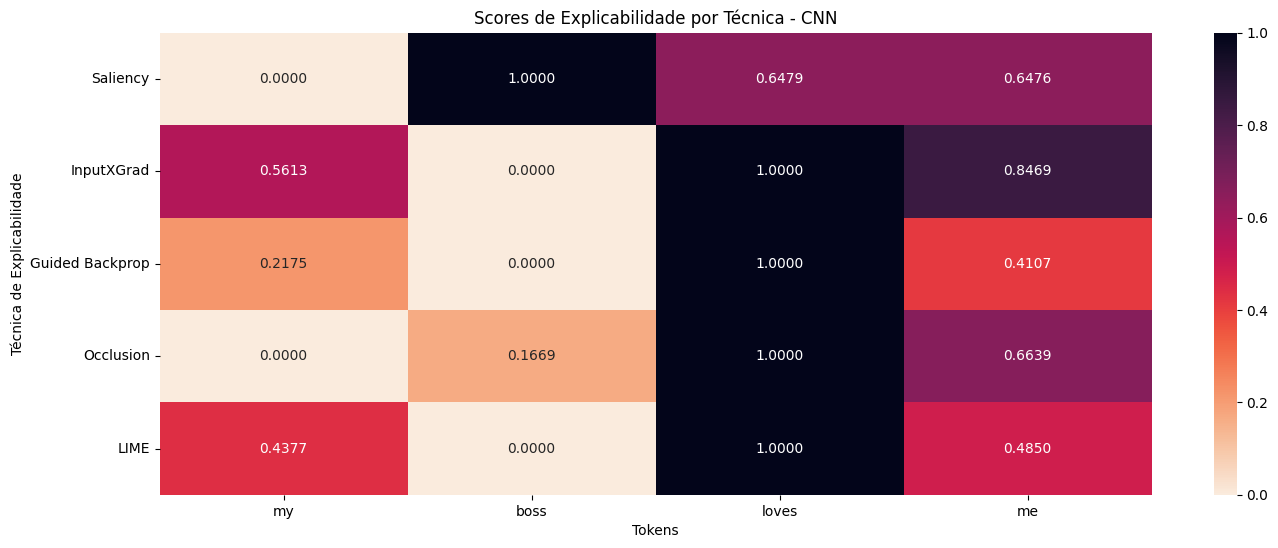

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

tokens = word_tokenize(text)

plt.figure(figsize=(16, 6))
sns.heatmap([saliency_scores, inputxgrad_scores, guided_backprop_scores, occlusion_scores, lime_scores],
            cmap="rocket_r", annot=True, yticklabels=['Saliency', 'InputXGrad', 'Guided Backprop', 'Occlusion', 'LIME'],
            xticklabels=tokens, fmt='.4f')

plt.title('Scores de Explicabilidade por Técnica - CNN')
plt.xlabel('Tokens')
plt.ylabel('Técnica de Explicabilidade')
plt.yticks(rotation=0)
plt.show()

##LSTM

In [ ]:
max_seq_length = tokenizer.get_max_len()

model_wrapper = TextClassifierWrapper(model_lstm, tokenizer, max_seq_length)

explainer = LimeTextExplainer(class_names=['negative', 'neutral', 'positive'])

explanation = explainer.explain_instance(text, model_wrapper, num_features=6, labels=[0,1,2])

In [ ]:
random_scores, tokens = generate_random_maps(model_lstm, text, tokenizer, label, mean=False)
print("Random Scores:")
for i, token in enumerate(tokens):
    score = random_scores[0][i].item()
    print(f"{token}: {score:.4f}")

saliency_scores, tokens = generate_saliency_maps(model_lstm, text, tokenizer, label, mean=False)
print("\nSaliency Scores:")
for i, token in enumerate(tokens):
    score = saliency_scores[0][i].item()
    print(f"{token}: {score:.4f}")

inputxgrad_scores, tokens = generate_inputxgrad_maps(model_lstm, text, tokenizer, label)
print("\nInputXGrad Scores:")
for i, token in enumerate(tokens):
    score = inputxgrad_scores[0][i].item()
    print(f"{token}: {score:.4f}")

guided_backprop_scores, tokens = generate_guided_backprop_maps(model_lstm, text, tokenizer, label)
print("\nGuided Backpropagation Scores:")
for i, token in enumerate(tokens):
    score = guided_backprop_scores[0][i].item()
    print(f"{token}: {score:.4f}")

occlusion_scores, tokens = generate_occlusion_maps(model_lstm, text, tokenizer, label)
print("\nOcclusion Scores:")
for i, token in enumerate(tokens):
    score = occlusion_scores[0][i].item()
    print(f"{token}: {score:.4f}")

print("\nLIME:")
lime_scores = generate_lime_maps(explanation, label)
for word in word_tokenize(text):
    score = lime_scores.get(word, 0.0)
    print(f'{word}: {score:.4f}')

Random Scores:
my: 17.0347
boss: 16.9220
loves: 17.3819
me: 17.0074

Saliency Scores:
my: 0.0635
boss: 1.0863
loves: 0.8312
me: 0.4619

InputXGrad Scores:
my: -0.0720
boss: -0.7238
loves: 0.9689
me: 0.0745

Guided Backpropagation Scores:
my: -0.2189
boss: -2.1713
loves: 2.9067
me: 0.2235

Occlusion Scores:
my: 0.0000
boss: -0.1792
loves: 0.1934
me: 0.1601

LIME:
my: 0.1927
boss: 0.0000
loves: 1.0000
me: 0.6905


In [ ]:
# Convertendo os tensores para numpy arrays e achatando
saliency_scores = saliency_scores.detach().cpu().numpy().flatten()
inputxgrad_scores = inputxgrad_scores.detach().cpu().numpy().flatten()
guided_backprop_scores = guided_backprop_scores.detach().cpu().numpy().flatten()
occlusion_scores = occlusion_scores.detach().cpu().numpy().flatten()
lime_scores = np.array([lime_scores.get(word, 0.0) for word in word_tokenize(text)])

# Normalizando os scores
saliency_scores = normalize_scores(saliency_scores)
inputxgrad_scores = normalize_scores(inputxgrad_scores)
guided_backprop_scores = normalize_scores(guided_backprop_scores)
occlusion_scores = normalize_scores(occlusion_scores)
lime_scores = normalize_scores(lime_scores)

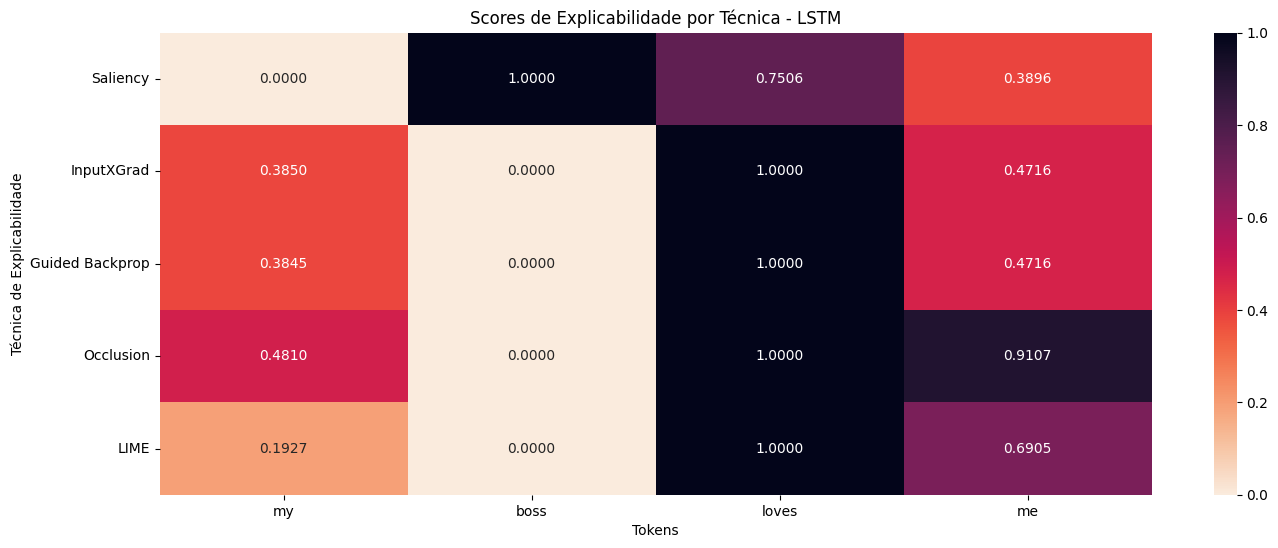

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

tokens = word_tokenize(text)

plt.figure(figsize=(16, 6))
sns.heatmap([saliency_scores, inputxgrad_scores, guided_backprop_scores, occlusion_scores, lime_scores],
            cmap="rocket_r", annot=True, yticklabels=['Saliency', 'InputXGrad', 'Guided Backprop', 'Occlusion', 'LIME'],
            xticklabels=tokens, fmt='.4f')

plt.title('Scores de Explicabilidade por Técnica - LSTM')
plt.xlabel('Tokens')
plt.ylabel('Técnica de Explicabilidade')
plt.yticks(rotation=0)
plt.show()

#Métricas

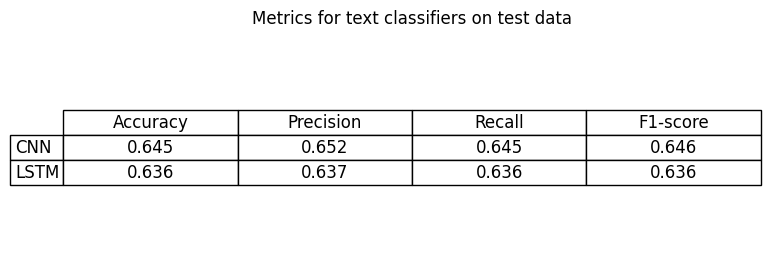

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_test(model, test_loader):
    model.eval()
    predictions = []
    true_labels = []
    with torch.no_grad():
        for inputs in test_loader:
            outputs = model(inputs[0])
            _, predicted = torch.max(outputs, 1)
            predictions.extend(predicted.tolist())
    return predictions

predictions_cnn = evaluate_test(model_cnn, test_loader)

accuracy_cnn = accuracy_score(y_test, predictions_cnn)
precision_cnn = precision_score(y_test, predictions_cnn, average='weighted')
recall_cnn = recall_score(y_test, predictions_cnn, average='weighted')
f1_cnn = f1_score(y_test, predictions_cnn, average='weighted')

metrics_df = pd.DataFrame({
    'Accuracy': [f'{accuracy_cnn:.3f}'],
    'Precision': [f'{precision_cnn:.3f}'],
    'Recall': [f'{recall_cnn:.3f}'],
    'F1-score': [f'{f1_cnn:.3f}']
})

predictions_lstm = evaluate_test(model_lstm, test_loader)

accuracy_lstm = accuracy_score(y_test, predictions_lstm)
precision_lstm = precision_score(y_test, predictions_lstm, average='weighted')
recall_lstm = recall_score(y_test, predictions_lstm, average='weighted')
f1_lstm = f1_score(y_test, predictions_lstm, average='weighted')

metrics_lstm_df = pd.DataFrame({
    'Accuracy': [f'{accuracy_lstm:.3f}'],
    'Precision': [f'{precision_lstm:.3f}'],
    'Recall': [f'{recall_lstm:.3f}'],
    'F1-score': [f'{f1_lstm:.3f}']
})

metrics_df = pd.concat([metrics_df, metrics_lstm_df], ignore_index=True)

metrics_df.index = ['CNN', 'LSTM']

plt.figure(figsize=(6, 3))
plt.title('Metrics for text classifiers on test data')
plt.axis('off')

table = plt.table(cellText=metrics_df.values,
                  rowLabels=metrics_df.index,
                  colLabels=metrics_df.columns,
                  cellLoc='center',
                  loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)

plt.show()


#Métodos de diagnóstico

*   Faithfulness (F)
*   Confidence Indication (CI)
*   Rationale Consistency (RC)






#Técnicas de diagnóstico

In [ ]:
maps = [generate_saliency_maps, generate_inputxgrad_maps, generate_guided_backprop_maps, generate_occlusion_maps]

##Faithfulness (F)
Definição: Mede o quanto a explicação gerada é fiel ao modelo original.

Cálculo: Pode ser calculada removendo ou alterando as partes do input que a explicação indicou como importantes e observando o quanto a predição do modelo muda. Se a predição mudar significativamente, a explicação é considerada fiel.

In [ ]:
def model_predict(model, text, tokenizer):
    tokens = word_tokenize(text)
    token_indices = torch.tensor([tokenizer.vocab.get(token, 0) for token in tokens]).unsqueeze(0)
    model.eval()
    outputs = model(token_indices)
    probabilities = torch.softmax(outputs, dim=1).squeeze()
    return probabilities

In [ ]:
import torch
from nltk.tokenize import word_tokenize

# Função para calcular a faithfulness
def calculate_faithfulness(model, generate_maps, X, y, tokenizer, threshold, t=True):
    faithfulness_scores = []

    for text, target in zip(X, y):
        # Gerar os saliency scores para o
        if len(word_tokenize(text)) >= 4:
            scores, tokens = generate_maps(model, text, tokenizer, target, t)

            # Calcular a predição original
            original_probabilities = model_predict(model, text, tokenizer)
            # Armazenar os tokens e seus saliency scores
            token_map = {token: score.item() for token, score in zip(tokens, scores[0])}

            # Simular a remoção ou alteração dos tokens
            for i, token in enumerate(tokens):
                # Substituir o token atual por '<pad>' e mover para o final
                modified_tokens = tokens[:i] + tokens[i+1:] + ['<pad>']
                modified_text = ' '.join(modified_tokens)

                # Calcular a predição após modificar o texto
                modified_probabilities = model_predict(model, modified_text, tokenizer)

                # Verificar a mudança nas probabilidades
                prob_change = torch.abs(original_probabilities - modified_probabilities).sum().item()

                # Se a mudança for significativa, adicionar o score de saliência
                if prob_change > threshold:
                    if not np.isnan(token_map[token]):
                        faithfulness_scores.append(token_map[token])


    # Calcular a média dos scores de faithfulness
    min_score = np.min(faithfulness_scores)
    max_score = np.max(faithfulness_scores)

    faithfulness_scores = (faithfulness_scores - min_score) / (max_score - min_score)

    if np.any(faithfulness_scores):
        mean_faithfulness = sum(faithfulness_scores) / len(faithfulness_scores)
    else:
        mean_faithfulness = 0.0

    return mean_faithfulness, faithfulness_scores

In [ ]:
FA_scores = []
faithfulness_score, scores = calculate_faithfulness(model_cnn, generate_random_maps ,X_test, y_test, tokenizer, 1)
FA_scores.append(faithfulness_score)
for i, generate in enumerate(maps):
    faithfulness_score, scores = calculate_faithfulness(model_cnn, generate ,X_test, y_test, tokenizer, 1)
    FA_scores.append(faithfulness_score)
    if i != 3:
        faithfulness_score, scores = calculate_faithfulness(model_cnn, generate ,X_test, y_test, tokenizer, 1, t=False)
        FA_scores.append(faithfulness_score)

In [ ]:
FA_lstm_scores = []
faithfulness_score, scores = calculate_faithfulness(model_lstm, generate_random_maps ,X_test, y_test, tokenizer, 1)
FA_lstm_scores.append(faithfulness_score)
for i, generate in enumerate(maps):
    faithfulness_score, scores = calculate_faithfulness(model_lstm, generate ,X_test, y_test, tokenizer, 1)
    FA_lstm_scores.append(faithfulness_score)
    if i != 3:
        faithfulness_score, scores = calculate_faithfulness(model_lstm, generate ,X_test, y_test, tokenizer, 1, t=False)
        FA_lstm_scores.append(faithfulness_score)

##Confidence Indication (CI)
Definição: Avalia se a técnica de explicabilidade pode prever a confiança do modelo em suas predições.

Cálculo: Pode ser medida calculando o erro absoluto médio (MAE) entre as confianças previstas pela técnica de explicabilidade e as confianças reais do modelo.

In [ ]:
from sklearn.metrics import mean_absolute_error

# Função para calcular a confiança prevista pela técnica de explicabilidade
def explainability_confidence(model, generate_maps, text, tokenizer, target, t=True):
    # Aqui usamos uma proxy como a média dos saliency scores
    saliency_scores, tokens = generate_maps(model, text, tokenizer, target, t)
    saliency_scores = (saliency_scores - saliency_scores.min()) / (saliency_scores.max() - saliency_scores.min())
    predicted_confidence = torch.mean(torch.tensor(saliency_scores)).item()
    return predicted_confidence

# Função para calcular a métrica CI
def calculate_confidence_indication(model, generate_maps, X, y, tokenizer, t=True):
    real_confidences = []
    predicted_confidences = []

    for text, target in zip(X, y):
        # Calcular a confiança real do modelo
        if len(word_tokenize(text)) >= 4:
            probabilities = model_predict(model, text, tokenizer)
            real_confidence = probabilities.max().item()
            real_confidences.append(real_confidence)

            # Calcular a confiança prevista pela técnica de explicabilidade
            predicted_confidence = explainability_confidence(model, generate_maps, text, tokenizer, target, t)
            if not np.isnan(predicted_confidence):
                predicted_confidences.append(predicted_confidence)
            else:
                predicted_confidences.append(torch.tensor(predicted_confidences).mean())

    # Calcular o erro absoluto médio (MAE)
    ci_score = mean_absolute_error(real_confidences, predicted_confidences)
    return ci_score

In [ ]:
CI_scores = []
CI_score = calculate_confidence_indication(model_cnn, generate_random_maps ,X_test, y_test, tokenizer)
CI_scores.append(CI_score)
for i, generate in enumerate(maps):
    CI_score = calculate_confidence_indication(model_cnn, generate ,X_test, y_test, tokenizer)
    CI_scores.append(CI_score)
    if i != 3:
        CI_score = calculate_confidence_indication(model_cnn, generate ,X_test, y_test, tokenizer, t=False)
        CI_scores.append(CI_score)

<ipython-input-137-bf69f7c3b8a8>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  predicted_confidence = torch.mean(torch.tensor(saliency_scores)).item()
<ipython-input-137-bf69f7c3b8a8>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  predicted_confidence = torch.mean(torch.tensor(saliency_scores)).item()
<ipython-input-137-bf69f7c3b8a8>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  predicted_confidence = torch.mean(torch.tensor(saliency_scores)).item()
<ipython-input-137-bf69f7c3b8a8>:8: UserWarning: To copy construct from a tensor, 

In [ ]:
CI_lstm_scores = []
CI_score = calculate_confidence_indication(model_lstm, generate_random_maps ,X_test, y_test, tokenizer)
CI_lstm_scores.append(CI_score)
for i, generate in enumerate(maps):
    CI_score = calculate_confidence_indication(model_lstm, generate ,X_test, y_test, tokenizer)
    CI_lstm_scores.append(CI_score)
    if i != 3:
        CI_score = calculate_confidence_indication(model_lstm, generate ,X_test, y_test, tokenizer, t=False)
        CI_lstm_scores.append(CI_score)

<ipython-input-137-bf69f7c3b8a8>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  predicted_confidence = torch.mean(torch.tensor(saliency_scores)).item()
<ipython-input-137-bf69f7c3b8a8>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  predicted_confidence = torch.mean(torch.tensor(saliency_scores)).item()
<ipython-input-137-bf69f7c3b8a8>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  predicted_confidence = torch.mean(torch.tensor(saliency_scores)).item()
<ipython-input-137-bf69f7c3b8a8>:8: UserWarning: To copy construct from a tensor, 

##Rationale Consistency (RC)
Definição: Mede a consistência das explicações fornecidas pela técnica de explicabilidade.

Cálculo: Pode ser medida observando se explicações semelhantes são dadas para inputs semelhantes, usando uma métrica de similaridade.

In [ ]:
import numpy as np
from scipy.stats import spearmanr
from sklearn.metrics import pairwise_distances
from sklearn.feature_extraction.text import TfidfVectorizer

def calculate_rationale_consistency(model, generate_maps, X, y, tokenizer, t=True):
    saliency_scores_list = []
    valid_indices = []

    # Obter os saliency scores para cada texto no dataset
    for idx, (text, target) in enumerate(zip(X, y)):
        if len(word_tokenize(text)) >= 4:
            saliency_scores, tokens = generate_maps(model, text, tokenizer, target, t)
            saliency_scores_list.append(saliency_scores)
            valid_indices.append(idx)

    # Converter os textos em vetores TF-IDF
    vectorizer = TfidfVectorizer(tokenizer=tokenizer if callable(tokenizer) else word_tokenize)
    X_tfidf = vectorizer.fit_transform(X).toarray()

    # Selecionar pares de inputs semelhantes
    similarity_matrix = pairwise_distances(X_tfidf, metric='cosine')
    similar_pairs = np.where(similarity_matrix < 0.3)

    # Filtrar os pares de índices válidos
    valid_similar_pairs = [(i, j) for i, j in zip(*similar_pairs) if i in valid_indices and j in valid_indices]

    # Mapear os pares de índices para os índices da lista saliency_scores_list
    valid_similar_pairs_mapped = [(valid_indices.index(i), valid_indices.index(j)) for i, j in valid_similar_pairs if valid_indices.index(i) < valid_indices.index(j)]

    # Calcular a correlação de Spearman para os pares de inputs semelhantes
    spearman_correlations = []

    for i, j in valid_similar_pairs_mapped:
        score1 = saliency_scores_list[i][0]
        score2 = saliency_scores_list[j][0]

        # Ajustar tamanhos dos scores
        max_len = max(len(score1), len(score2))
        score1_adjusted = np.pad(score1.detach().numpy(), (0, max_len - len(score1)), mode='constant')
        score2_adjusted = np.pad(score2.detach().numpy(), (0, max_len - len(score2)), mode='constant')

        # Calcular a correlação de Spearman
        corr, _ = spearmanr(score1_adjusted, score2_adjusted)
        if not np.isnan(corr):
            spearman_correlations.append(corr)

    min_corr = np.min(spearman_correlations)
    max_corr = np.max(spearman_correlations)
    spearman_correlations = (spearman_correlations - min_corr) / (max_corr - min_corr)

    # Calcular a média das correlações de Spearman
    if np.any(spearman_correlations):
        mean_spearman_corr = np.mean(spearman_correlations)
    else:
        mean_spearman_corr = 0.0

    return mean_spearman_corr, spearman_correlations

In [ ]:
RC_scores = []
RC_score, scores = calculate_rationale_consistency(model_cnn, generate_random_maps ,X_test, y_test, tokenizer)
RC_scores.append(RC_score)
for i, generate in enumerate(maps):
    RC_score, scores = calculate_rationale_consistency(model_cnn, generate ,X_test, y_test, tokenizer)
    RC_scores.append(RC_score)
    if i != 3:
        RC_score, scores = calculate_rationale_consistency(model_cnn, generate ,X_test, y_test, tokenizer, t=False)
        RC_scores.append(RC_score)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extr

In [ ]:
RC_lstm_scores = []
RC_score, scores = calculate_rationale_consistency(model_lstm, generate_random_maps ,X_test, y_test, tokenizer)
RC_lstm_scores.append(RC_score)
for i, generate in enumerate(maps):
    RC_score, scores = calculate_rationale_consistency(model_lstm, generate ,X_test, y_test, tokenizer)
    RC_lstm_scores.append(RC_score)
    if i != 3:
        RC_score, scores = calculate_rationale_consistency(model_lstm, generate ,X_test, y_test, tokenizer, t=False)
        RC_lstm_scores.append(RC_score)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extr

#Propriedades de diagnóstico




Os gráficos de diagnóstico apresentados avaliam várias propriedades de explicabilidade das técnicas de saliência aplicadas a uma CNN e a uma LSTM. As propriedades analisadas incluem Indicação de Confiança (CI), Fidelidade (F) e Consistência de Racionalidade (RC). Cada técnica de saliência é comparada com um baseline aleatório.

No gráfico radar da CNN, podemos observar o seguinte:

* Random: Exibe valores consistentemente baixos em todas as propriedades, como esperado.
* Saliency (u) e Saliency (l2): Ambos mostram desempenho moderado, com Saliency (u) bem superior em fidelidade
* InputXGrad (u) e InputXGrad (l2): Têm desempenho similar ao Saliency, mas com valores ligeiramente superiores em fidelidade (F).
* Guide BP (u) e Guide BP (l2): Melhor desempenho em todos os metodos para (u) mas com um desempenho em inferior para (l2)
* Occlusion: Desempenho insatisfatorio com valores proximos ao baseline random, exceto por (RC)

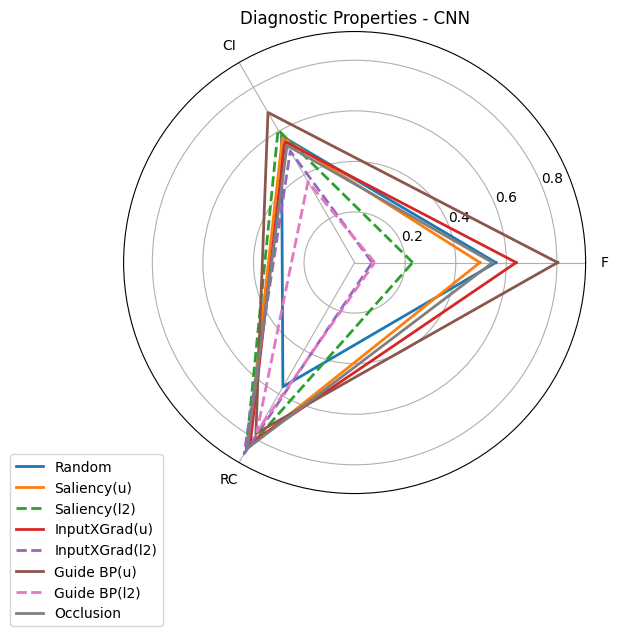

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

FA_scores_aux = FA_scores[:8]
CI_scores_aux = CI_scores[:8]
RC_scores_aux = RC_scores[:8]

max_CI = 1
CI_scores_aux = [max_CI - score for score in CI_scores_aux]

labels = ['F', 'CI', 'RC']
num_vars = len(labels)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

FA_scores_aux += FA_scores_aux[:1]
CI_scores_aux += CI_scores_aux[:1]
RC_scores_aux += RC_scores_aux[:1]

label = ['Random', 'Saliency(u)', 'Saliency(l2)','InputXGrad(u)','InputXGrad(l2)', 'Guide BP(u)','Guide BP(l2)' , 'Occlusion']

for i in range(len(FA_scores_aux)-1):
    if '(l2)' in label[i]:
        linestyle = 'dashed'
        fill_alpha = 0
    else:
        linestyle = 'solid'
        fill_alpha = 0
    values = [FA_scores_aux[i], CI_scores_aux[i], RC_scores_aux[i], FA_scores_aux[i]]
    ax.plot(angles, values, linewidth=2, linestyle=linestyle, label=label[i])
    ax.fill(angles, values, alpha=fill_alpha)

plt.xticks(angles[:-1], labels)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title("Diagnostic Properties - CNN")
plt.show()


No gráfico radar da LSTM, as observações são semelhantes às da CNN, com algumas diferenças:

* Random: Assim como no CNN, exibe valores baixos em todas as propriedades.
* Saliency (u) e Saliency (l2): Desempenho superior ao baseline random para (u) em todas as propriedas, e desempenho baixo em (F) para (l2)
* InputXGrad (u) e InputXGrad (l2): Desempenho parecido com o Saliency, mas com uma fidelidade (F) bem superior.
* Guide BP (u) e Guide BP (l2): Apresentam altos valores em consistência racional (RC) e confiança (CI), mas uma queda em significativa em (F)
* Occlusion: Desempenho satisfatório em todas as propriedades

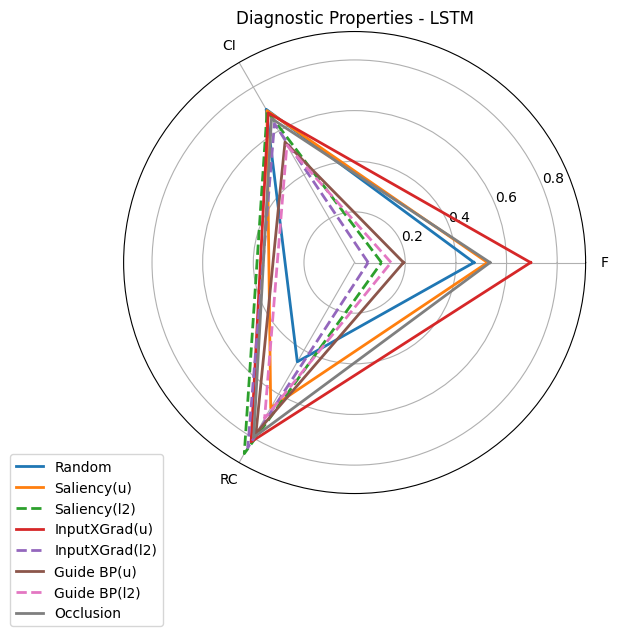

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

FA_scores_aux = FA_lstm_scores[:8]
CI_scores_aux = CI_lstm_scores[:8]
RC_scores_aux = RC_lstm_scores[:8]

max_CI = 1
CI_scores_aux = [max_CI - score for score in CI_scores_aux]

labels = ['F', 'CI', 'RC']
num_vars = len(labels)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

FA_scores_aux += FA_scores_aux[:1]
CI_scores_aux += CI_scores_aux[:1]
RC_scores_aux += RC_scores_aux[:1]

label = ['Random', 'Saliency(u)', 'Saliency(l2)','InputXGrad(u)','InputXGrad(l2)', 'Guide BP(u)','Guide BP(l2)' , 'Occlusion']

for i in range(len(FA_scores_aux)-1):
    if '(l2)' in label[i]:
        linestyle = 'dashed'
        fill_alpha = 0
    else:
        linestyle = 'solid'
        fill_alpha = 0
    values = [FA_scores_aux[i], CI_scores_aux[i], RC_scores_aux[i], FA_scores_aux[i]]
    ax.plot(angles, values, linewidth=2, linestyle=linestyle, label=label[i])
    ax.fill(angles, values, alpha=fill_alpha)

plt.xticks(angles[:-1], labels)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title("Diagnostic Properties - LSTM")
plt.show()


**Conclusão**

Os gráficos de diagnóstico revelam que as técnicas de saliência diferem em seu desempenho em propriedades importantes como Indicação de Confiança, Fidelidade e Consistência de Racionalidade. Embora as técnicas de occlusion mostrem um desempenho sólido em várias propriedades, técnicas como InputXGrad e Guide BP também são eficazes, especialmente em termos de Fidelidade.

Esses resultados sugerem que a escolha da técnica de explicabilidade pode depender do aspecto específico da explicação que é mais importante para a aplicação em questão.